<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea surface temperature: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **COMPLETE WITH ANY PRE-REQUISITES (e.g. account access), IF ANY**

There are no prerequisite notebooks for this module.
- **COMPLETE WITH ANY PRE-REQUISITE NOTEBOOKS, IF ANY**
    
</div>
<hr>

# 1.1 Map Metop SST Metagranules - Downloaded from IFREMER Opensearch
### Data used 

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-------------:|:-----------------:|:-----------------:|
| Full resolution Metop-B Sea Surface Temperature metagranules | EO:EUM:DAT:METOP:MGR-SST | <a href="https://osi-saf.eumetsat.int/products/osi-204-b" target="_blank">link</a>| OSI-204-b | 
| Full resolution Metop-C Sea Surface Temperature metagranules | EO:EUM:DAT:METOP:MGR-SST | <a href="https://osi-saf.eumetsat.int/products/osi-204-c" target="_blank">link</a>| OSI-204-c | 


### Learning outcomes

At the end of this notebook you will know;
* How to open Metop SST netcdf metagranules
* Map SST using cartopy 

### Outline 

...

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

 1. [Definining geographical area](#section1)
 1. [Setting parameters](#section2)
 1. [Mapping SST](#section3)

<hr>

In [1]:
# library imports 

from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ssl
import os
import warnings
ssl._create_default_https_context = ssl._create_unverified_context

warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Defining geographical area
[Back to top](#TOC_TOP)

</div>

This first section allows to set the geographical area

In [2]:
# setting geographical area
lon_min = -8
lon_max = 3
lat_min = 43
lat_max = 53

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Setting parameters
[Back to top](#TOC_TOP)

</div>

Setting directory where to read data files

In [3]:
directory = 'metagranules'

Choosing color palet

In [4]:
cmap = mpl_cm.get_cmap('RdYlBu_r')

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Mapping SST
[Back to top](#TOC_TOP)

</div>

Mapping figure based on retrieved metagranules

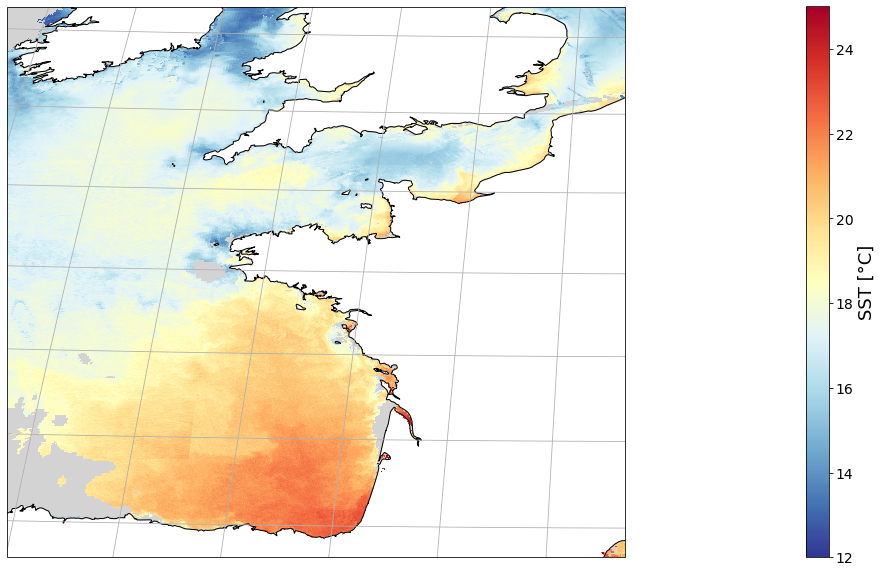

In [5]:
fig = plt.figure(figsize=(16,9))
projection=ccrs.Orthographic((lon_max-lon_min)/2,(lat_max-lat_min)/2)
ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightgrey')
ax.gridlines()
ax.coastlines('10m')
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = NetCDFFile(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        sst = nc.variables['sea_surface_temperature'][:]
        ql  = nc.variables['quality_level'][:]
        nc.close()
        sst_ql345 = np.ma.masked_where(ql<3, sst)
        ql2345 = np.ma.masked_where(ql<1, ql)
        im = plt.pcolormesh(lon, lat, sst_ql345[0,:,:]-273.15, transform=ccrs.PlateCarree(), cmap=cmap)
        im.set_clim(12,25)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('SST [°C]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>